## Luis Eduardo Jiménez del Muro - 04/09/2024
---

# Reporte de laboratorio 3

## Estudio de Caso: Visualización de Indicadores para la Toma de Decisiones

### Contexto y Planteamiento del Problema
En este estudio de caso, asumimos el rol de un analista de datos en un restaurante que busca optimizar su operación diaria. El objetivo es ayudar a la dirección a tomar decisiones informadas sobre la asignación de personal y la gestión del menú, basándonos en los patrones de gasto de los clientes durante el día y la noche, y cómo estos patrones afectan las ventas y las propinas.

#### Objetivo del negocio: Optimizar la asignación de personal y ajustar los precios del menú para maximizar la rentabilidad durante las horas pico.

Problema específico: 
- ¿Cuándo es el momento más rentable del día y qué estrategia de personal y precios debería implementar el restaurante para maximizar las ganancias?

### Proceso de Análisis para la Toma de Decisiones
- Recopilación de datos: Utilizaremos un conjunto de datos que contiene información sobre las facturas de los clientes, el momento del día (almuerzo o cena), y las propinas dejadas.

- Análisis preliminar: Realizaremos visualizaciones para identificar patrones de gasto durante las diferentes horas del día.

- Generación de insights: Extraeremos insights de las visualizaciones para ayudar a la dirección a tomar decisiones sobre la asignación de personal y ajustes en los precios del menú.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns     

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### **Objetivo #1: Numero de meseros dimámico (número de meseros diferente por día)**

##### *1. En que días van mas clientes*

En esta parte, se agrupan los datos por día y se suma el tamaño de todas las mesas de cada día, resultando en el total de clientes por día.

C:\Users\epile\AppData\Local\Temp\ipykernel_8628\1860594288.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('day')['size'].sum().plot(kind='bar', color='skyblue')


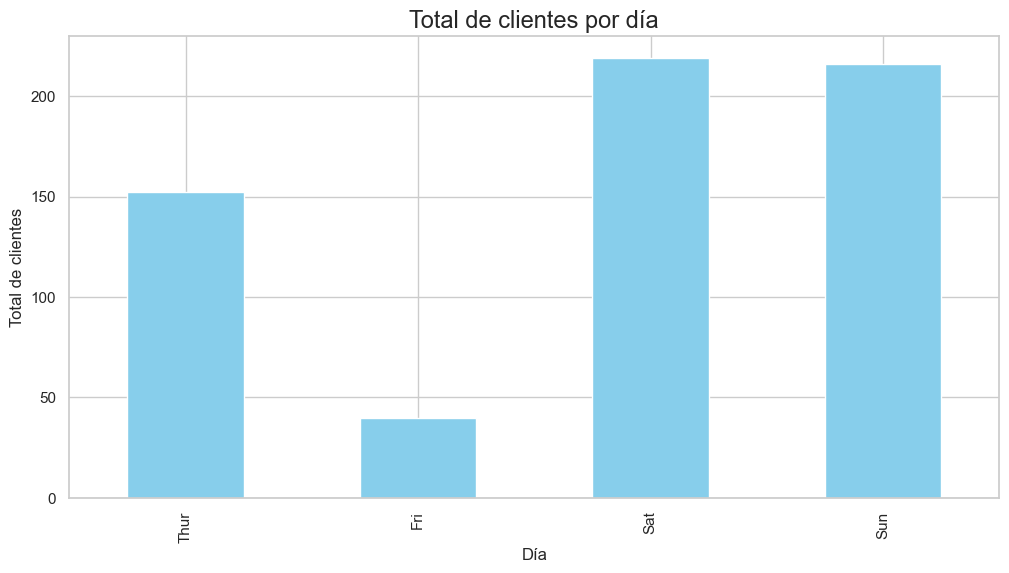

In [5]:
data.groupby('day')['size'].sum().plot(kind='bar', color='skyblue')
plt.title('Total de clientes por día', fontsize=17)
plt.xlabel('Día')
plt.ylabel('Total de clientes')
plt.show()

Se puede observar que el día viernes fue el día mas bajo de todos en términos de total de clientes. Mientras los demás días estuvieron entre 150 y 200 clientes, el viernes tuvo menos de 50. Esto puede significar que podría ser buena idea tener menos personal de meseros ese día, a menos que haya sido un caso especial y por eso hubo menos clientes.

##### *2. Distribución de personas en la mesa por día y hora.*

En esta parte se trata de conocer cuantos clientes hubo tomando en cuenta el día y la hora, por lo tanto hay que realizar una nueva columna que tome en cuenta estas características juntando la columna "time" y "day".

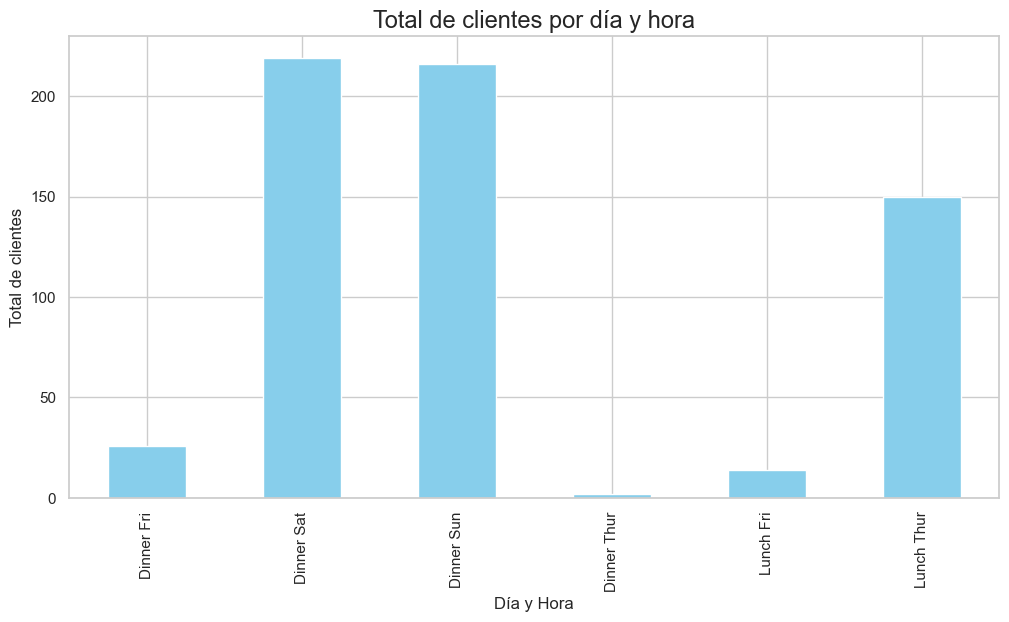

In [6]:
data['day_time'] = data['time'].astype(str) + ' ' + data['day'].astype(str)
data.groupby('day_time')['size'].sum().plot(kind='bar', color='skyblue')
plt.title('Total de clientes por día y hora', fontsize=17)
plt.xlabel('Día y Hora')
plt.ylabel('Total de clientes')
plt.show()

Se puede observar que los momentos que requiere mas personal el restaurante son los sabados y domingos por la noche. La hora de la comida del jueves tambien es importante. La noche de jueves y viernes sumado a la comida del viernes requiere de muy poco personal, incluso podría considerarse el no abrir tomando en cuenta lo bajo que es comparado a los otros días y horas.

##### *3. Ingreso total por día.*

En esta parte se observará la suma de las cuentas por día, para saber que días esta ingresando mas dinero el restaurante.

C:\Users\epile\AppData\Local\Temp\ipykernel_8628\837460823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby('day')['total_bill'].sum().plot(kind='bar', color='skyblue')


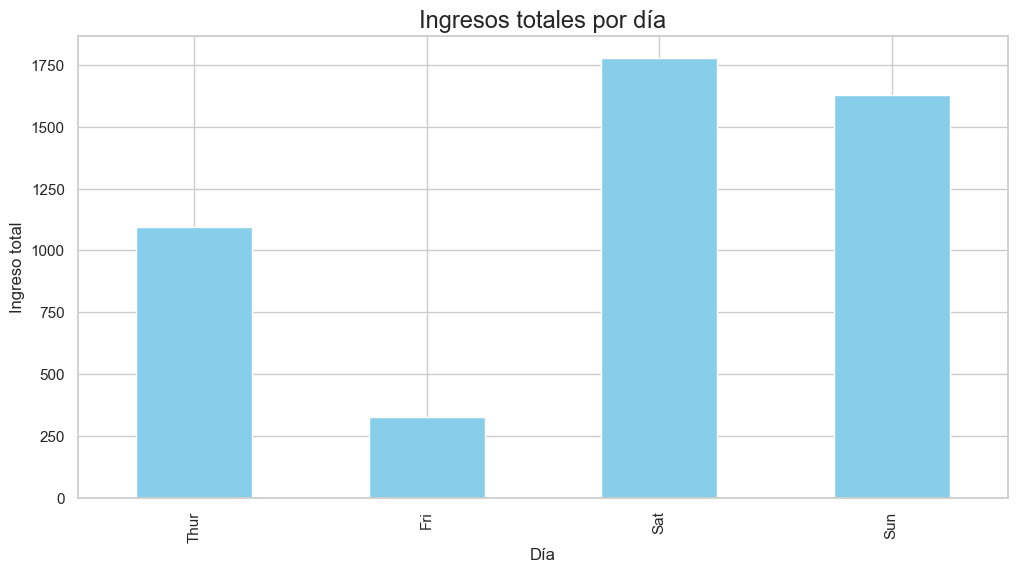

In [7]:
data.groupby('day')['total_bill'].sum().plot(kind='bar', color='skyblue')
plt.title('Ingresos totales por día', fontsize=17)
plt.xlabel('Día')
plt.ylabel('Ingreso total')
plt.show()

Observamos el mismo patrón que en los clientes totales, los sabados y domíngos están ingresando casi 7 veces mas de dinero que el día viernes. Además aunque el jueves no es tan fuerte como el sábado y domingo, lo es lo suficiente para considerarlo importante.

##### *4. Dia y tiempo por sexo del cliente*

En esta punto se va a dar a conocer cuantas cuentas pagadas por hombres y mujeres hay por día y hora.

C:\Users\epile\AppData\Local\Temp\ipykernel_8628\2364230727.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['day_time', 'sex']).size().unstack().plot(kind='bar', color=['skyblue', 'pink'])


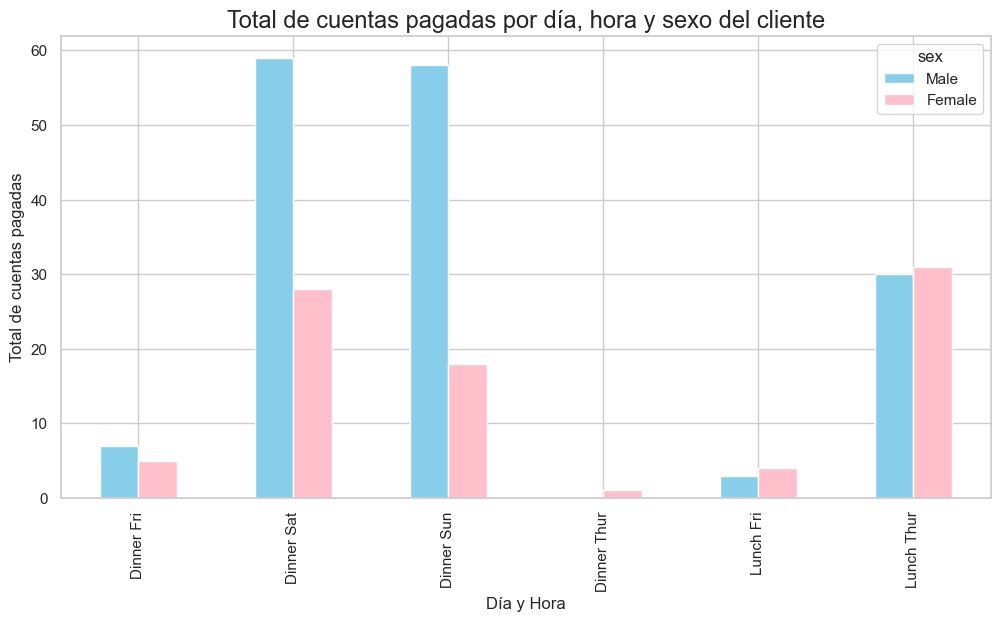

In [8]:
data.groupby(['day_time', 'sex']).size().unstack().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Total de cuentas pagadas por día, hora y sexo del cliente', fontsize=17)
plt.xlabel('Día y Hora')
plt.ylabel('Total de cuentas pagadas')
plt.show()

Se puede observar que por las noches hay mas hombres que pagan la cuenta que mujeres, sin embarho las comidas de los jueves esta mas igualado. En este punto se podría analizar a que se debe que haya pocas cuentas pagadas por mujeres.

### **Objetivo #2: Precio dinámico (estar cambiando el precio del menú)**

##### *1. El total de la cuenta / número de personas*


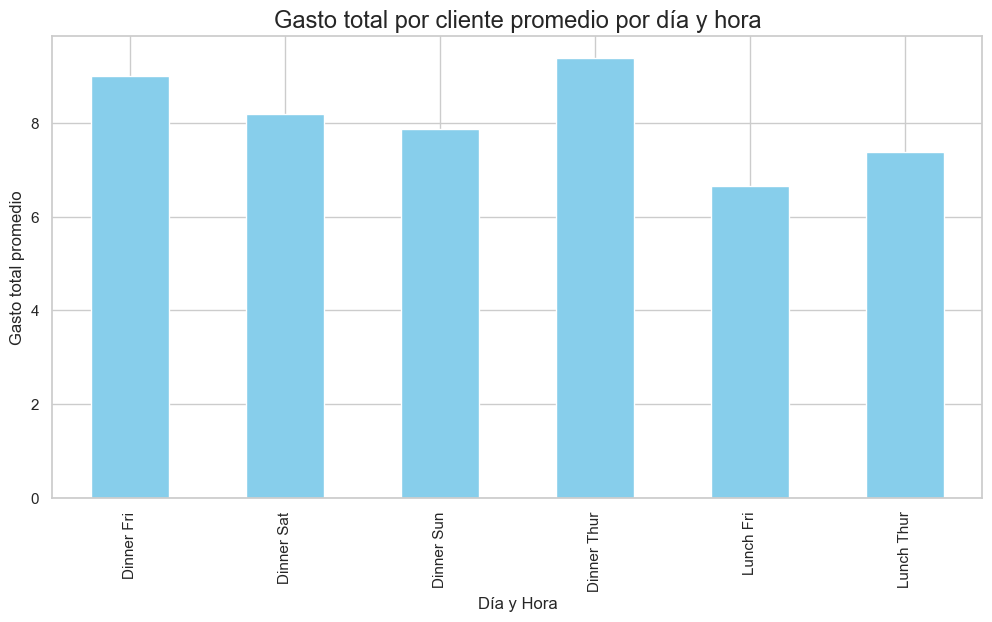

In [9]:
data['total_cliente'] = data['total_bill'] / data['size']
data.groupby('day_time')['total_cliente'].mean().plot(kind='bar', color='skyblue')
plt.title('Gasto total por cliente promedio por día y hora', fontsize=17)
plt.xlabel('Día y Hora')
plt.ylabel('Gasto total promedio')
plt.show()

Sin tomar en cuenta el día viernes dado que sabemos que es un día sin mucho ingreso, se puede observar que la cena del sabado y domingo, aunque son los momentos con más clientes en el restaurante no son el momento en el que se gasta mas dinero por cliente. Dato que sabemos lo fuerte que es esa hora y día, conviene subir los precios del menú a esa hora y que el gasto promedio por cliente se eleve.

##### *2. En que hora se come mas (hubo más tickets)*


Aquí simplemente se quiere mostrar en que día y hora hubo mas tickets.

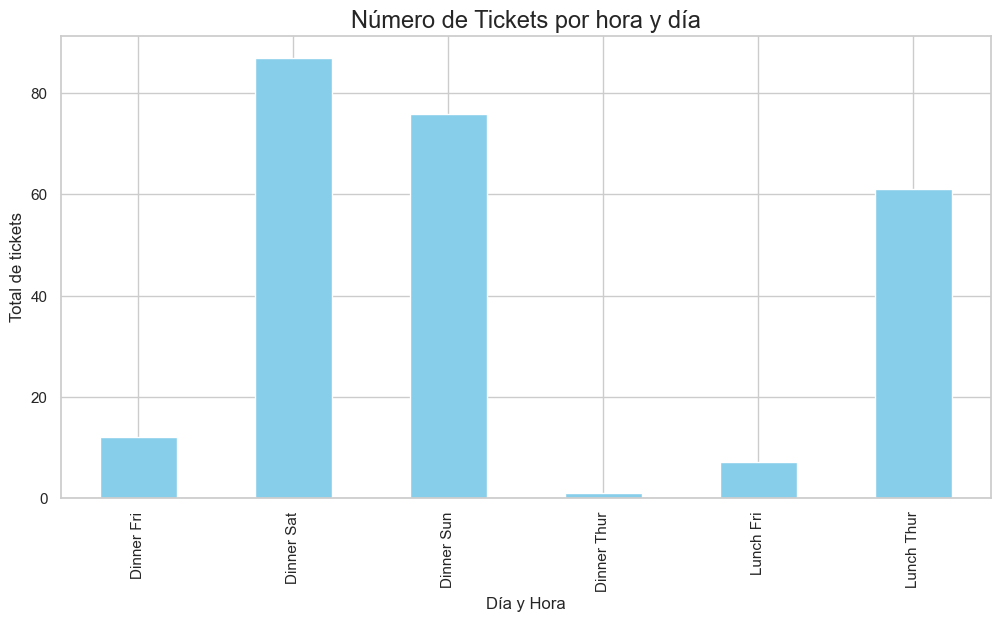

In [10]:
data.groupby('day_time').size().plot(kind='bar', color='skyblue')
plt.title('Número de Tickets por hora y día', fontsize=17)
plt.xlabel('Día y Hora')
plt.ylabel('Total de tickets')
plt.show()

Es el mismo patrón que se ha observado, la sena del sábado y domingo son el punto fuerte del restaurante sin olvidar la comida del jueves, por lo que se podrían incrementar los precios del menú en estas horas para aprovechar la concurrencia y pensar en reducirlo durante los días y momentos bajos para tratar de atraer clientes.

##### *3. Fumadores vs no fumadores por día y tiempo.*

En esta parte se quiere observar si hay algún día que se tenga que tomar en cuenta de forma diferente por la cantidad de fumadores que asisten.

C:\Users\epile\AppData\Local\Temp\ipykernel_8628\62715995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['day_time', 'smoker']).size().unstack().plot(kind='bar', color=['gray', 'skyblue'])


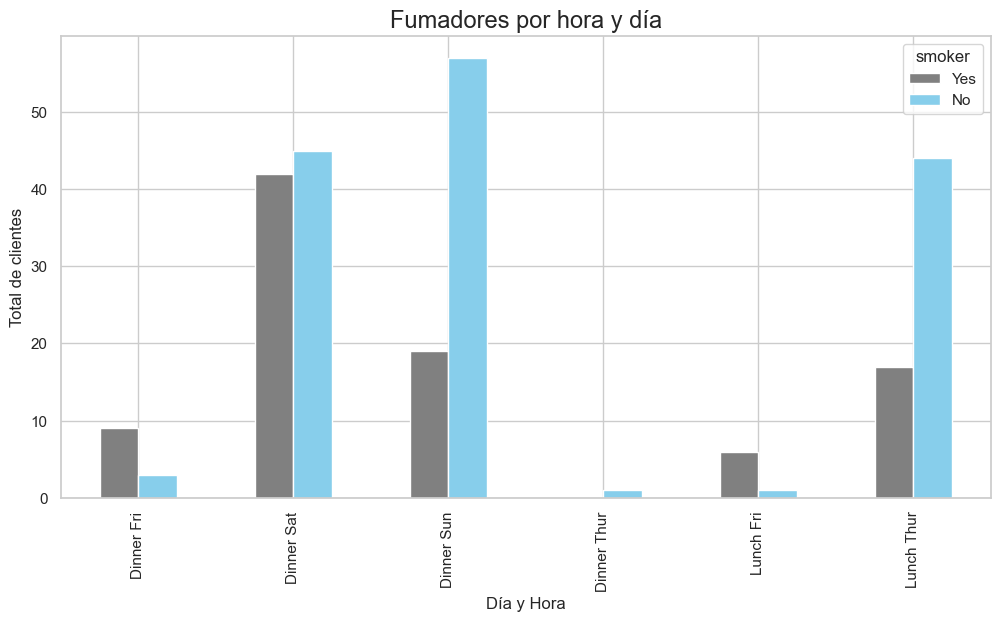

In [11]:
data.groupby(['day_time', 'smoker']).size().unstack().plot(kind='bar', color=['gray', 'skyblue'])
plt.title('Fumadores por hora y día', fontsize=17)
plt.xlabel('Día y Hora')
plt.ylabel('Total de clientes')
plt.show()

El sábado por la noche es un momento muy concurrido por fumadores, por lo que se podría tomar a consideración el poner algún precio especial si el cliente es fumador, para así icrementar un poquito los ingresos.

##### *4. Cuenta total promedio por fumador vs no fumador*

Aquí simplemente se quiere ver quien gasta mas en promedio, si los fumadores o los no fumadores.

C:\Users\epile\AppData\Local\Temp\ipykernel_8628\893417516.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['day_time', 'smoker'])['total_bill'].mean().unstack().plot(kind='bar', color=['gray', 'skyblue'])


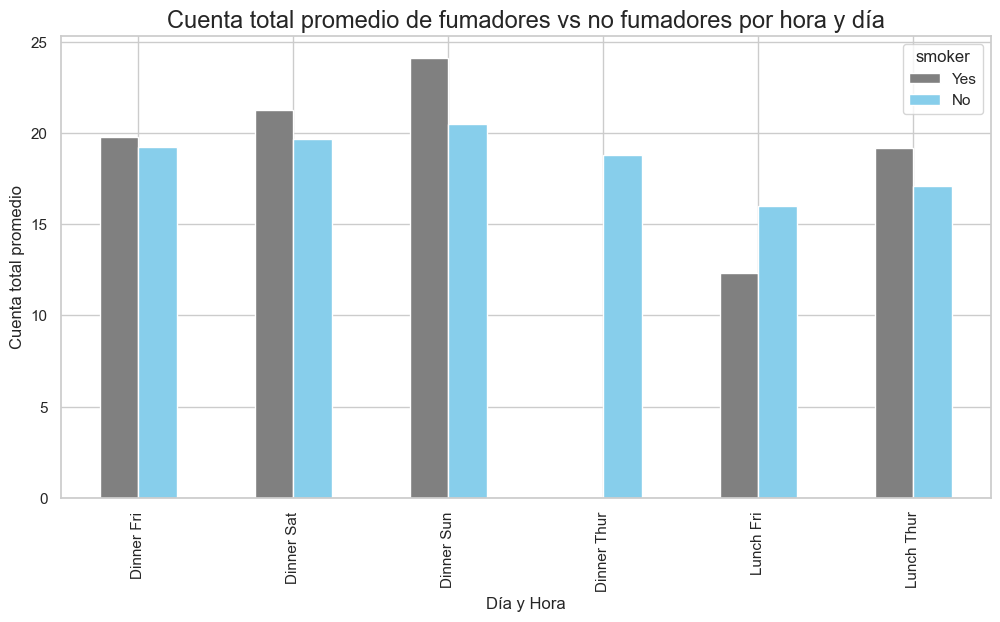

In [12]:
data.groupby(['day_time', 'smoker'])['total_bill'].mean().unstack().plot(kind='bar', color=['gray', 'skyblue'])
plt.title('Cuenta total promedio de fumadores vs no fumadores por hora y día', fontsize=17)
plt.xlabel('Día y Hora')
plt.ylabel('Cuenta total promedio')
plt.show()

Tomando en cuenta solo los momentos fuertes del restaurante (comida del jueves y cena del sabado y domingo), podemos observar que los fumadores siempre gastan mas en promedio que los no fumadore, por lo que, nuevamente se puede considerar una tarifa especial para los fumadores.

### **Conclusiones del análisis.**

- Se pudo observar que los momentos más fuertes del restaurante son la comida del jueves y cena del sábado y domingo.
- Si hay mucho personal contratado en los momentos débiles (comida del viernes y cena del jueves y viernes) hay que realizar un recorte de personal urgente, o por el otro lado, pensar en estrategias que atraigan mas clientes en esos momentos.
- La gran mayoría de las cuentas pagadas en las cenas del sábado y domingo son pagadas por hombres, con ello, podríamos pensar que cosas que sean atractivas para los hombres y los hagan gastar mas dado que hay altas probabilidades de que ellos paguen la cuenta.
- Los momentos fuertes del restaurante (comida del jueves y cena del sábado y domingo) son los momentos en que en promedio se gasta menos dinero por cliente, por lo tanto, habría que pensar como hacer que cada cliente gaste mas, dado que son los momentos que mas clientes hay en el restaurante.
- La cena del sábado hay una alta cantidad de cuentas de fumadores, por lo que ahí hay una posible oportunidad a aprovechar.
- Por último, se observó que en los momentos fuertes, en promedio los fumadores gastan más que los no fumadores. Nuevamente, esto nos lleva a considerar cobrar alguna tarifa diferente a los fumadores.